In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_excel('C:/Users/tangu/OneDrive/Desktop/steel plant project/Troweld Free Website Template - Free-CSS.com/troweld-html/sales_customers.xls')


In [24]:
data.sample(5)

,,YEAR_MONTH,CUSTOMER_CODE,SUM(A.SALES_QTY_TOT),SUM(SALES_VALUE_TOT)
5427,5428,2023-01,9015990,24.84,1473012.0
33992,33993,2019-09,9018759,46.96,1635403.0
42705,42706,2022-01,9000071,183.47,10901059.0
2316,2317,2020-12,9015783,434.27,21357431.0
5403,5404,2023-02,9003565,16.67,987280.0


In [25]:
data.shape

(44092, 5)

In [26]:
data.describe()

,,CUSTOMER_CODE,SUM(A.SALES_QTY_TOT),SUM(SALES_VALUE_TOT)
count,44092.000000,4.409200e+04,44092.000000,4.409200e+04
mean,22046.500000,9.012610e+06,645.791122,1.990187e+07
std,12728.408371,1.096892e+05,3467.618745,7.972782e+07
min,1.000000,8.981000e+04,0.000000,0.000000e+00
25%,11023.750000,9.002139e+06,32.060000,1.318461e+06
50%,22046.500000,9.010065e+06,100.000000,3.952134e+06
75%,33069.250000,9.018282e+06,320.985000,1.380117e+07
max,44092.000000,9.950224e+06,106852.060000,3.541091e+09


In [27]:
data.isnull().sum()

                        0
YEAR_MONTH              0
CUSTOMER_CODE           0
SUM(A.SALES_QTY_TOT)    0
SUM(SALES_VALUE_TOT)    0
dtype: int64

In [28]:
per = data.isnull().sum() * 100 / len(data)
print(per)

                        0.0
YEAR_MONTH              0.0
CUSTOMER_CODE           0.0
SUM(A.SALES_QTY_TOT)    0.0
SUM(SALES_VALUE_TOT)    0.0
dtype: float64


In [29]:
data.duplicated().any()

False

In [30]:
data['SUM(A.SALES_QTY_TOT)']

0        801.46
1        107.00
2        200.00
3         58.67
4        235.23
          ...  
44087     20.00
44088     32.00
44089     11.72
44090     13.47
44091      6.19
Name: SUM(A.SALES_QTY_TOT), Length: 44092, dtype: float64

In [31]:
mean_weight = data['SUM(A.SALES_QTY_TOT)'].mean()
median_weight = data['SUM(A.SALES_QTY_TOT)'].median()

In [32]:
print(mean_weight,median_weight)

645.7911219722398 100.0


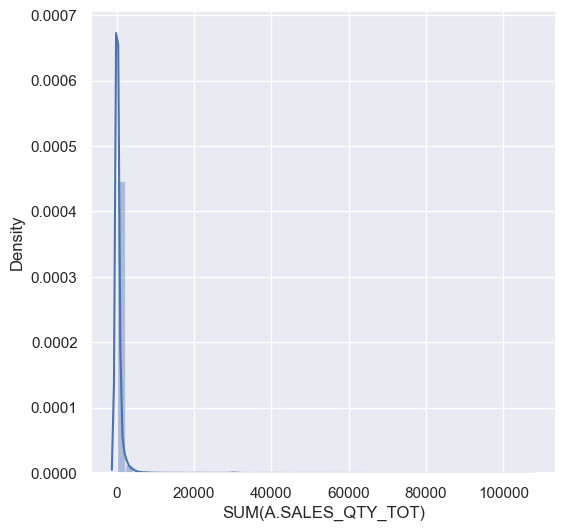

In [33]:
# Item_Weight distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['SUM(A.SALES_QTY_TOT)'])
plt.show()

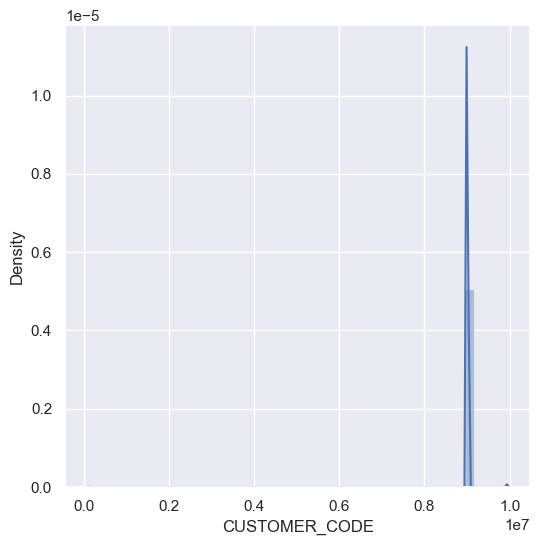

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(data['CUSTOMER_CODE'])
plt.show()

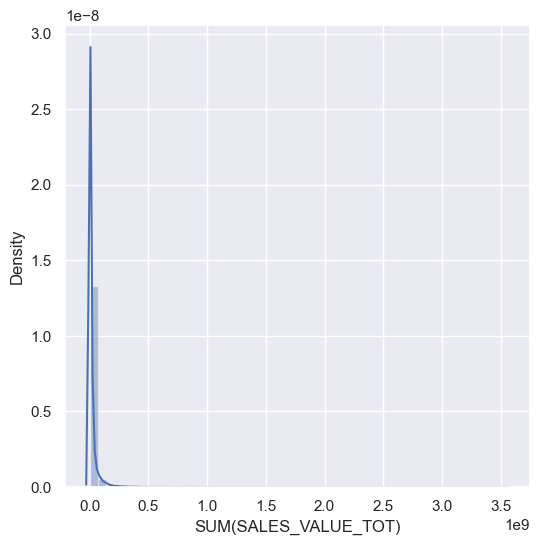

In [35]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data['SUM(SALES_VALUE_TOT)'])
plt.show()

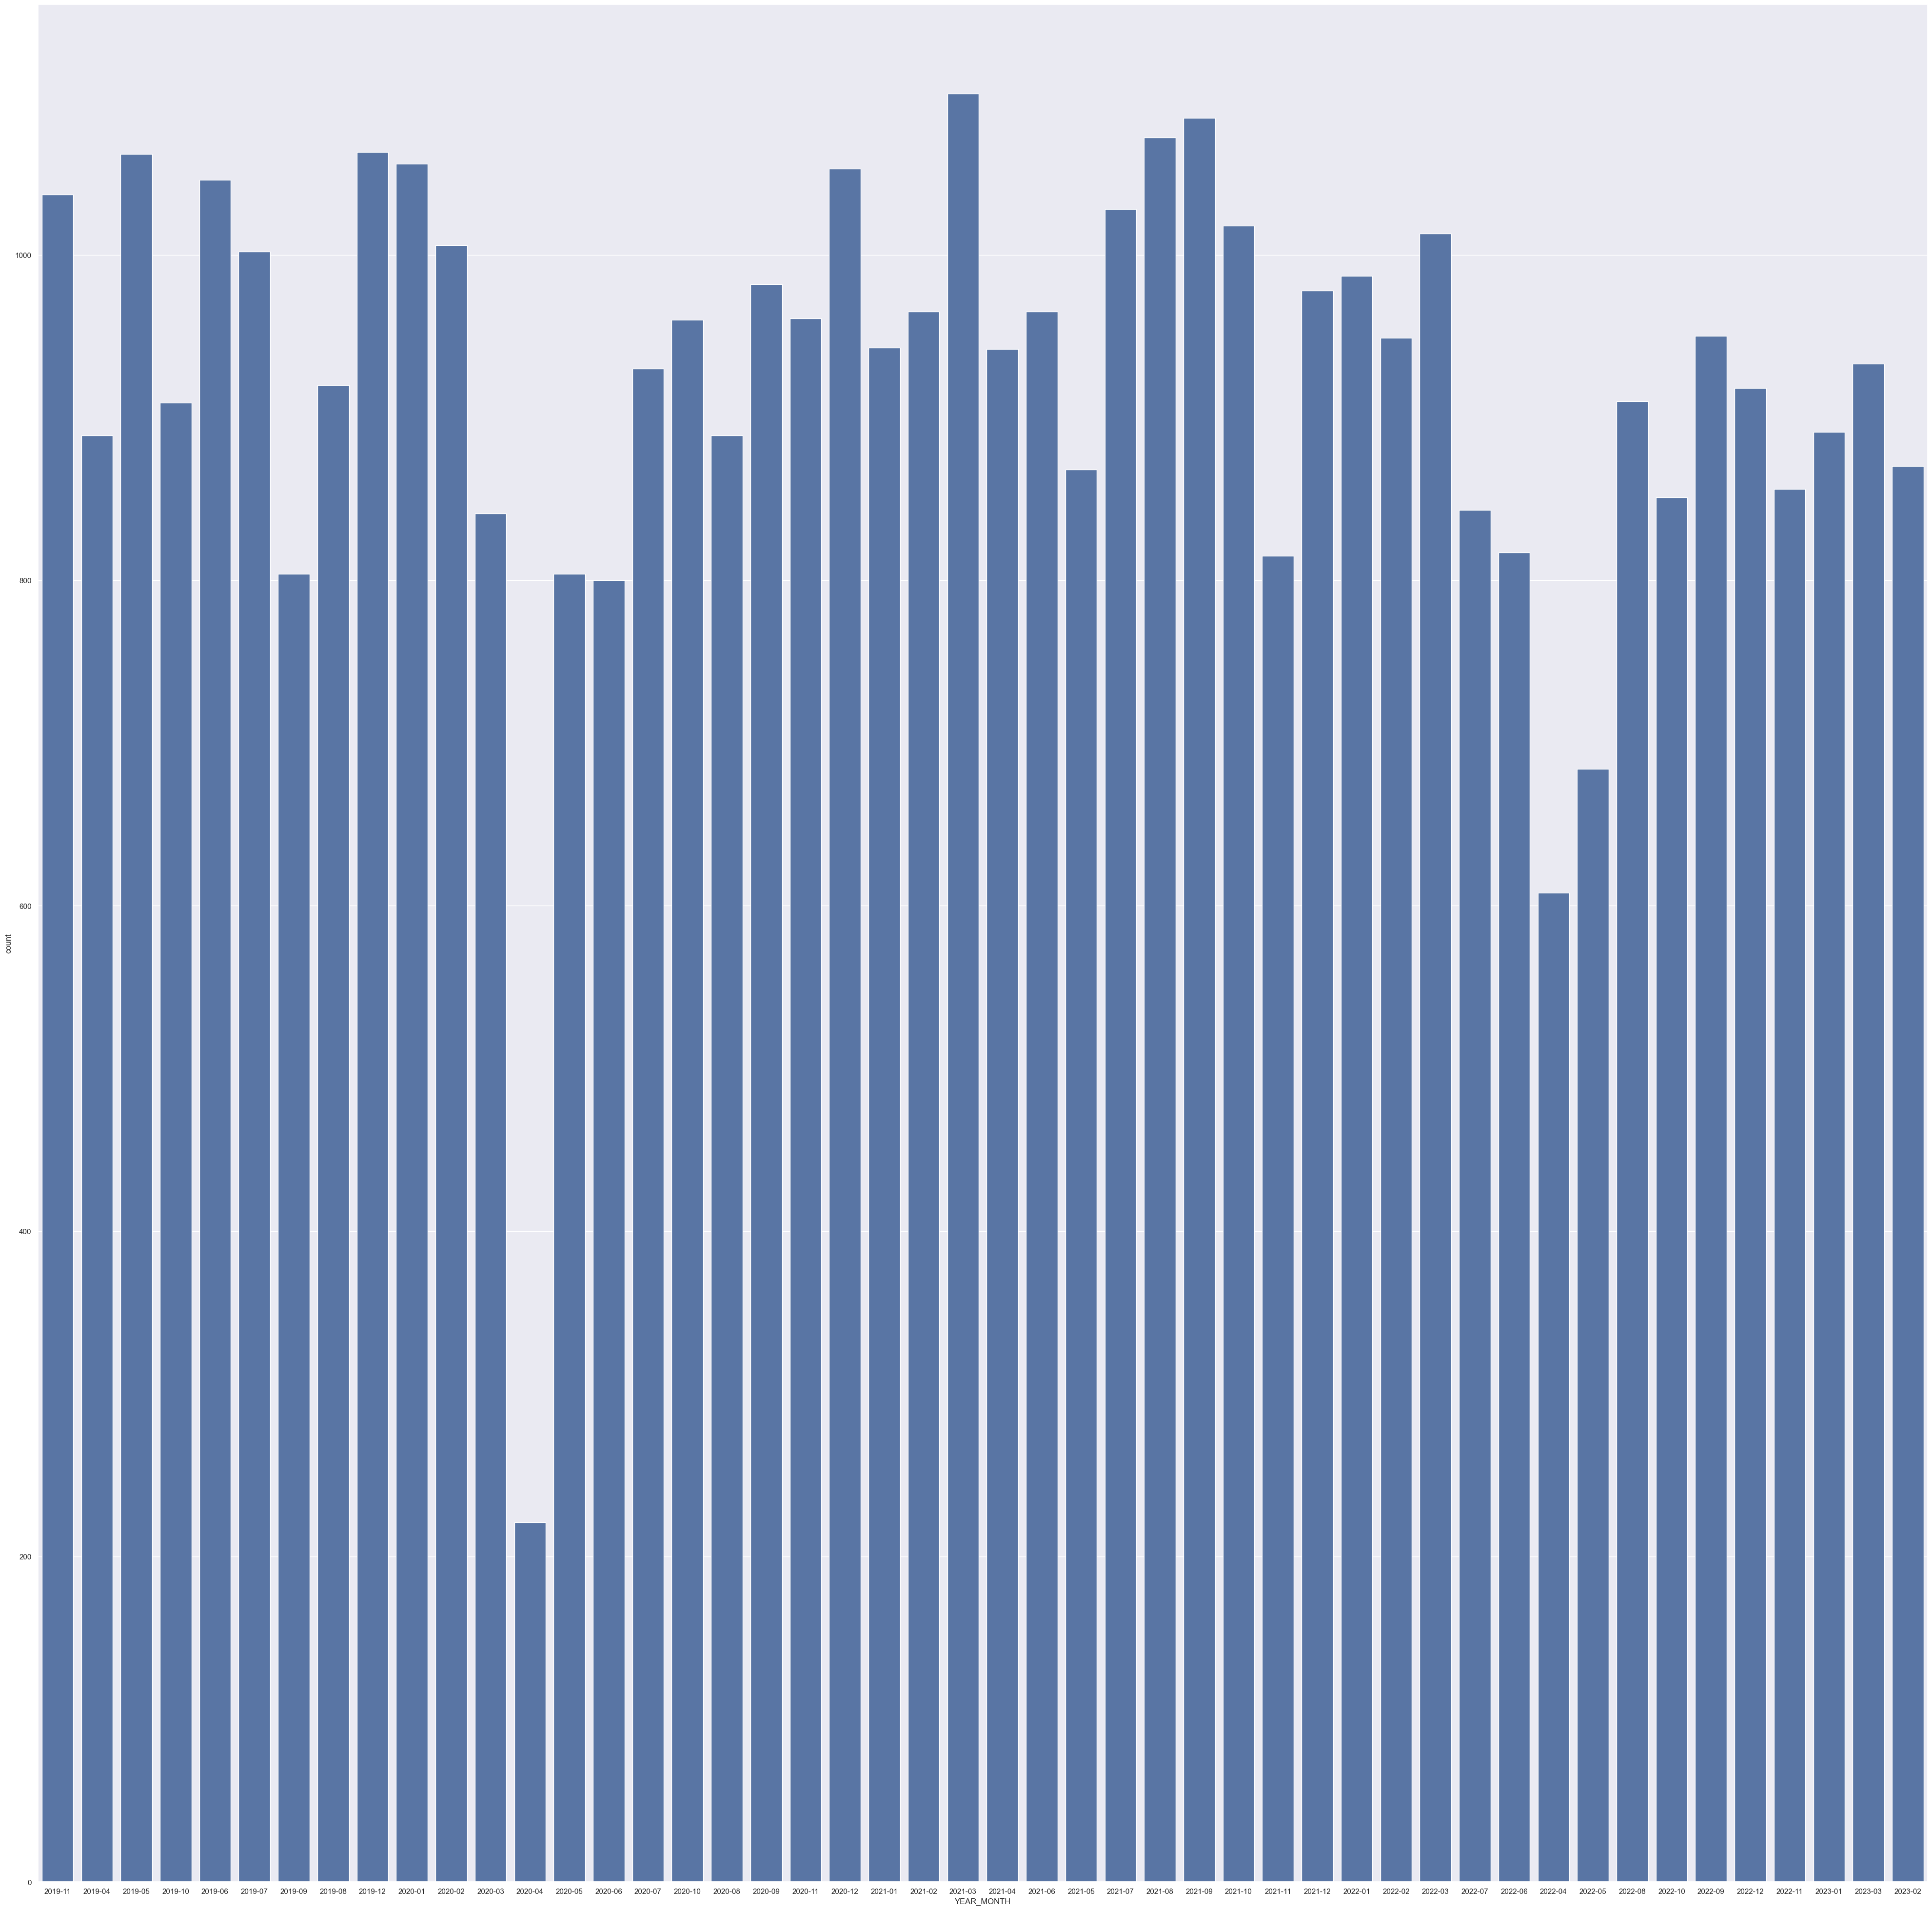

In [36]:
# Outlet_Establishment_Year column
plt.figure(figsize=(50,50))
sns.countplot(x='YEAR_MONTH', data=data)
plt.show()

In [37]:
data.head()

,,YEAR_MONTH,CUSTOMER_CODE,SUM(A.SALES_QTY_TOT),SUM(SALES_VALUE_TOT)
0,1,2019-11,9002145,801.46,29139824.9
1,2,2019-04,9000579,107.00,645312.0
2,3,2019-04,9018352,200.00,1066000.0
3,4,2019-05,9001453,58.67,2686919.9
4,5,2019-05,9001568,235.23,10791341.5


In [38]:
encoder = LabelEncoder()

In [39]:
data['CUSTOMER_CODE'] = encoder.fit_transform(data['CUSTOMER_CODE'])

data['SUM(A.SALES_QTY_TOT)'] = encoder.fit_transform(data['SUM(A.SALES_QTY_TOT)'])

data['SUM(SALES_VALUE_TOT)'] = encoder.fit_transform(data['SUM(SALES_VALUE_TOT)'])

data['YEAR_MONTH'] = encoder.fit_transform(data['YEAR_MONTH'])

In [40]:
data.head()

,,YEAR_MONTH,CUSTOMER_CODE,SUM(A.SALES_QTY_TOT),SUM(SALES_VALUE_TOT)
0,1,7,494,20901,37494
1,2,0,138,8129,5381
2,3,0,2197,12339,8740
3,4,1,339,4906,17756
4,5,1,377,13403,30748


In [41]:
X = data.drop(columns='YEAR_MONTH', axis=1)
Y = data['YEAR_MONTH']

In [42]:
X.shape

(44092, 4)

In [43]:
Y.shape

(44092,)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [45]:
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)
y_pred = regressor.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming Y_test and y_pred are your true and predicted values respectively
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 7.758851584502905
Mean Absolute Error: 1.453108637964885
R^2 Score: 0.959270179271698


In [47]:
# Calculate accuracy score with reference x_test, y_test
accuracy = regressor.score(X_test, Y_test)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.959270179271698


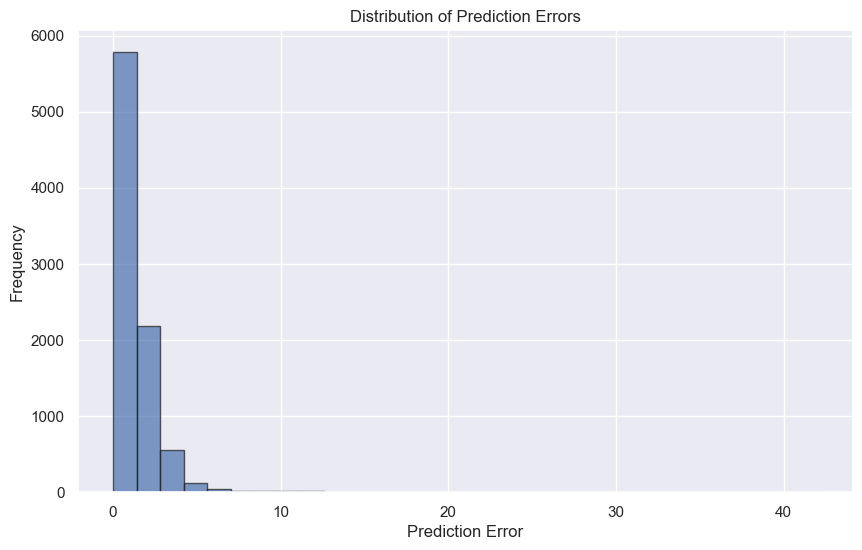

In [48]:
# Visualize the distribution of prediction errors
errors = np.abs(Y_test - y_pred)
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

In [49]:
#accuracy(r2 score with y_test,y_pred)
acc = r2_score(Y_test, y_pred)
print(f"Accuracy Score: {acc*100}")

Accuracy Score: 95.9270179271698


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44092 entries, 0 to 44091
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0                         44092 non-null  int64
 1   YEAR_MONTH            44092 non-null  int32
 2   CUSTOMER_CODE         44092 non-null  int64
 3   SUM(A.SALES_QTY_TOT)  44092 non-null  int64
 4   SUM(SALES_VALUE_TOT)  44092 non-null  int64
dtypes: int32(1), int64(4)
memory usage: 1.5 MB


In [51]:
data.sample(4)

,,YEAR_MONTH,CUSTOMER_CODE,SUM(A.SALES_QTY_TOT),SUM(SALES_VALUE_TOT)
39751,39752,7,2507,915,3380
4285,4286,38,349,14286,34282
12907,12908,18,76,16894,28074
6450,6451,7,2185,5492,16087


In [52]:
input = (40,3689,2197,12320)
new_input = np.asanyarray(input,dtype=float)
prediciton = regressor.predict(new_input.reshape(1,-1))
print(prediciton)

[22.392769]


In [53]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_excel('/content/sales_customers.xls')

# Clean column names
data.columns = data.columns.str.strip()

# Print the first few rows and column names to check the data
print(data.head())
print(data.columns)

# Check for the exact name of the 'YEAR_MONTH' column
if 'YEAR_MONTH' in data.columns:
    date_col = 'YEAR_MONTH'
else:
    print("Date column 'YEAR_MONTH' not found in the dataset.")
    raise KeyError("The required date column 'YEAR_MONTH' is not found.")

# Convert the date column to datetime
data[date_col] = pd.to_datetime(data[date_col])

# Set the date column as the index
data.set_index(date_col, inplace=True)

# Create lag features
data['lag_1'] = data['SUM(SALES_VALUE_TOT)'].shift(1)
data['lag_2'] = data['SUM(SALES_VALUE_TOT)'].shift(2)
data.dropna(inplace=True)

# Split the data into training and testing sets
X = data[['lag_1', 'lag_2']]
y = data['SUM(SALES_VALUE_TOT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Function to predict future sales for a given date
def predict_sales(input_date):
    input_date = pd.to_datetime(input_date, format='%Y-%m')

    # Generate a date range up to the input date
    future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), end=input_date, freq='MS')

    # Create a DataFrame for future predictions
    future_data = pd.DataFrame(index=future_dates)
    future_data['lag_1'] = np.nan
    future_data['lag_2'] = np.nan

    # Fill the lag features based on the latest available data
    last_known_value = data.iloc[-1]['SUM(SALES_VALUE_TOT)']
    if len(future_data) > 0:
        future_data.iloc[0, future_data.columns.get_loc('lag_1')] = last_known_value
        if len(future_data) > 1:
            future_data.iloc[1, future_data.columns.get_loc('lag_2')] = last_known_value

        for i in range(1, len(future_data)):
            future_data.iloc[i, future_data.columns.get_loc('lag_1')] = future_data.iloc[i-1, future_data.columns.get_loc('predicted_sales')] if 'predicted_sales' in future_data.columns else future_data.iloc[i-1, future_data.columns.get_loc('lag_1')]
            if i > 1:
                future_data.iloc[i, future_data.columns.get_loc('lag_2')] = future_data.iloc[i-2, future_data.columns.get_loc('predicted_sales')] if 'predicted_sales' in future_data.columns else future_data.iloc[i-2, future_data.columns.get_loc('lag_2')]

        # Predict future sales
        future_data['predicted_sales'] = model.predict(future_data[['lag_1', 'lag_2']])

        # If input_date is not in the index, return the closest future prediction
        if input_date not in future_data.index:
            print(f"The input date {input_date} is not in the index. Returning the closest future prediction.")
            return future_data.iloc[-1]['predicted_sales']
        else:
            return future_data.loc[input_date, 'predicted_sales']
    else:
        print("Input date is before the last known date in the dataset.")
        return None

user_input_date = '2024-03'
predicted_sales = predict_sales(user_input_date)
print(f"Predicted sales for {user_input_date}: {predicted_sales}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/sales_customers.xls'